In [1]:
#importing libs
import pandas as pd
import numpy as np
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
import tensorflow as tf
import tensorflow.keras
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [2]:
#loading dataset
df_raw = pd.read_csv("C:/Users/aymen/PycharmProjects/pythonProject/logistique.csv", delimiter=",")
#removal of noise in the dataset
list1 = ["26/07/2019", "05/01/1980"]
df_raw = df_raw[df_raw.dateexpe.isin(list1) == False]
#fixing the format of the expedition as it create alot of problems later
df_raw['dateexpe'] = pd.to_datetime(df_raw['dateexpe'], dayfirst=True).dt.date
df_raw

,datedecreationdecommande,providerservice_id,dateexpe
0,2019-11-01 11:40:35.9930000,48,2019-11-02
1,2019-11-01 11:40:35.9700000,48,2019-11-02
2,2019-11-01 10:24:40.8930000,48,2019-11-02
3,2019-11-01 14:24:21.1770000,48,2019-11-02
4,2019-11-01 13:28:35.7900000,48,2019-11-02
...,...,...,...
572836,2019-12-16 06:12:25.2170000,48,2019-12-17
572837,2019-12-16 06:12:25.4630000,48,2019-12-17
572838,2019-12-15 22:32:36.3200000,48,2019-12-17
572839,2019-12-15 20:06:55.0670000,48,2019-12-17


In [3]:
#we want to add other features to our dataset
#the first one is the debit (how many orders are shipped per day)
#we notice that our dataset contains some noise in the forme of outdated informations dating from 05/01/1980 and one lone order from 26/07/2019
df_raw.groupby("dateexpe").count()

,datedecreationdecommande,providerservice_id
dateexpe,,
2019-11-02,157,157
2019-11-04,5232,5232
2019-11-05,10215,10215
2019-11-06,8638,8638
2019-11-07,10206,10206
2019-11-08,7262,7262
2019-11-09,6803,6803
2019-11-10,1533,1533
2019-11-11,6039,6039


In [4]:

#preparing the debit dataframe
df_buffer_01 = df_raw.groupby("dateexpe").count()
df_buffer_01 = df_buffer_01.drop("providerservice_id",axis=1)
df_buffer_01 = df_buffer_01.rename(columns = {'datedecreationdecommande':'debit_of_this_day'})
df_buffer_01['dateexpe'] = df_buffer_01.index
df_buffer_01 = df_buffer_01.reset_index(drop=True)
df_buffer_01

,debit_of_this_day,dateexpe
0,157,2019-11-02
1,5232,2019-11-04
2,10215,2019-11-05
3,8638,2019-11-06
4,10206,2019-11-07
5,7262,2019-11-08
6,6803,2019-11-09
7,1533,2019-11-10
8,6039,2019-11-11
9,10049,2019-11-12


In [5]:
#merging the debit dataframe with the original dataframe
df_merged = pd.merge(df_raw, df_buffer_01)
from datetime import datetime
df_merged

,datedecreationdecommande,providerservice_id,dateexpe,debit_of_this_day
0,2019-11-01 11:40:35.9930000,48,2019-11-02,157
1,2019-11-01 11:40:35.9700000,48,2019-11-02,157
2,2019-11-01 10:24:40.8930000,48,2019-11-02,157
3,2019-11-01 14:24:21.1770000,48,2019-11-02,157
4,2019-11-01 13:28:35.7900000,48,2019-11-02,157
...,...,...,...,...
572804,2019-11-23 11:00:34.1930000,20,2019-11-24,1086
572805,2019-11-23 09:10:14.0330000,21,2019-11-24,1086
572806,2019-11-23 09:10:13.9430000,21,2019-11-24,1086
572807,2019-11-23 11:04:01.8300000,21,2019-11-24,1086


In [6]:
df_buffer_03 = df_buffer_01
df_buffer_03["debit_of_this_day"] = df_buffer_03["debit_of_this_day"].shift(1)
df_buffer_03 = df_buffer_03.rename(columns = {'debit_of_this_day':'debit_of_yesterday'})
df_buffer_03 = df_buffer_03.dropna()
df_buffer_03["debit_of_yesterday"] = df_buffer_03["debit_of_yesterday"].astype(int)
df_buffer_03

,debit_of_yesterday,dateexpe
1,157,2019-11-04
2,5232,2019-11-05
3,10215,2019-11-06
4,8638,2019-11-07
5,10206,2019-11-08
6,7262,2019-11-09
7,6803,2019-11-10
8,1533,2019-11-11
9,6039,2019-11-12
10,10049,2019-11-13


In [7]:
df_merged = pd.merge(df_merged, df_buffer_03)
df_merged

,datedecreationdecommande,providerservice_id,dateexpe,debit_of_this_day,debit_of_yesterday
0,2019-11-01 08:58:12.3330000,16,2019-11-04,5232,157
1,2019-11-01 20:43:16.7470000,16,2019-11-04,5232,157
2,2019-11-01 09:38:50.2500000,21,2019-11-04,5232,157
3,2019-11-01 15:16:15.9600000,16,2019-11-04,5232,157
4,2019-11-01 17:45:55.4030000,21,2019-11-04,5232,157
...,...,...,...,...,...
572647,2019-11-23 11:00:34.1930000,20,2019-11-24,1086,7708
572648,2019-11-23 09:10:14.0330000,21,2019-11-24,1086,7708
572649,2019-11-23 09:10:13.9430000,21,2019-11-24,1086,7708
572650,2019-11-23 11:04:01.8300000,21,2019-11-24,1086,7708


In [8]:
#seperating time and date into multi^ple colums to work with later
df_merged['date'] = pd.to_datetime(df_merged['datedecreationdecommande']).dt.date
#df_merged['dateexpe'] = pd.to_datetime(df_merged['dateexpe'], dayfirst=True).dt.date
df_merged['time'] = pd.to_datetime(df_merged['datedecreationdecommande']).dt.time
df_merged = df_merged.rename(columns = {'date':'date_emission'})
df_merged

,datedecreationdecommande,providerservice_id,dateexpe,debit_of_this_day,debit_of_yesterday,date_emission,time
0,2019-11-01 08:58:12.3330000,16,2019-11-04,5232,157,2019-11-01,08:58:12.333000
1,2019-11-01 20:43:16.7470000,16,2019-11-04,5232,157,2019-11-01,20:43:16.747000
2,2019-11-01 09:38:50.2500000,21,2019-11-04,5232,157,2019-11-01,09:38:50.250000
3,2019-11-01 15:16:15.9600000,16,2019-11-04,5232,157,2019-11-01,15:16:15.960000
4,2019-11-01 17:45:55.4030000,21,2019-11-04,5232,157,2019-11-01,17:45:55.403000
...,...,...,...,...,...,...,...
572647,2019-11-23 11:00:34.1930000,20,2019-11-24,1086,7708,2019-11-23,11:00:34.193000
572648,2019-11-23 09:10:14.0330000,21,2019-11-24,1086,7708,2019-11-23,09:10:14.033000
572649,2019-11-23 09:10:13.9430000,21,2019-11-24,1086,7708,2019-11-23,09:10:13.943000
572650,2019-11-23 11:04:01.8300000,21,2019-11-24,1086,7708,2019-11-23,11:04:01.830000


In [9]:
#converting time of order from our human format into machine format using minutes starting from midnight.
#time of order is a crucial feature because it can indicate if the order was made early in the day
# and have a chance to be procecced that day or it was made too late and go for the next day.
a = np.full((572809),'00:00:00.000000')
zero = {"zero":a}
dfp = pd.DataFrame(zero)
dfp['zero'] = pd.to_datetime(dfp['zero']).dt.time

df_merged['time_of_order_in_minutes'] = (pd.to_timedelta(df_merged['time'].astype(str)) - pd.to_timedelta(dfp['zero'].astype(str)))
df_merged['time_of_order_in_minutes'] = (df_merged['time_of_order_in_minutes'] / pd.Timedelta(minutes=1)).astype(int)
df_merged

,datedecreationdecommande,providerservice_id,dateexpe,debit_of_this_day,debit_of_yesterday,date_emission,time,time_of_order_in_minutes
0,2019-11-01 08:58:12.3330000,16,2019-11-04,5232,157,2019-11-01,08:58:12.333000,538
1,2019-11-01 20:43:16.7470000,16,2019-11-04,5232,157,2019-11-01,20:43:16.747000,1243
2,2019-11-01 09:38:50.2500000,21,2019-11-04,5232,157,2019-11-01,09:38:50.250000,578
3,2019-11-01 15:16:15.9600000,16,2019-11-04,5232,157,2019-11-01,15:16:15.960000,916
4,2019-11-01 17:45:55.4030000,21,2019-11-04,5232,157,2019-11-01,17:45:55.403000,1065
...,...,...,...,...,...,...,...,...
572647,2019-11-23 11:00:34.1930000,20,2019-11-24,1086,7708,2019-11-23,11:00:34.193000,660
572648,2019-11-23 09:10:14.0330000,21,2019-11-24,1086,7708,2019-11-23,09:10:14.033000,550
572649,2019-11-23 09:10:13.9430000,21,2019-11-24,1086,7708,2019-11-23,09:10:13.943000,550
572650,2019-11-23 11:04:01.8300000,21,2019-11-24,1086,7708,2019-11-23,11:04:01.830000,664


In [10]:
#we calculate here the delay in days between the order day and the expedition day
df_merged['delay_in_days'] = (df_merged['dateexpe'] - df_merged['date_emission'])
df_merged['delay_in_days'] = (df_merged['delay_in_days'] / pd.Timedelta(days=1)).astype(int)
df_merged

,datedecreationdecommande,providerservice_id,dateexpe,debit_of_this_day,debit_of_yesterday,date_emission,time,time_of_order_in_minutes,delay_in_days
0,2019-11-01 08:58:12.3330000,16,2019-11-04,5232,157,2019-11-01,08:58:12.333000,538,3
1,2019-11-01 20:43:16.7470000,16,2019-11-04,5232,157,2019-11-01,20:43:16.747000,1243,3
2,2019-11-01 09:38:50.2500000,21,2019-11-04,5232,157,2019-11-01,09:38:50.250000,578,3
3,2019-11-01 15:16:15.9600000,16,2019-11-04,5232,157,2019-11-01,15:16:15.960000,916,3
4,2019-11-01 17:45:55.4030000,21,2019-11-04,5232,157,2019-11-01,17:45:55.403000,1065,3
...,...,...,...,...,...,...,...,...,...
572647,2019-11-23 11:00:34.1930000,20,2019-11-24,1086,7708,2019-11-23,11:00:34.193000,660,1
572648,2019-11-23 09:10:14.0330000,21,2019-11-24,1086,7708,2019-11-23,09:10:14.033000,550,1
572649,2019-11-23 09:10:13.9430000,21,2019-11-24,1086,7708,2019-11-23,09:10:13.943000,550,1
572650,2019-11-23 11:04:01.8300000,21,2019-11-24,1086,7708,2019-11-23,11:04:01.830000,664,1


In [11]:
#we also want to know how many orders was accepted the day before to have an idea of the work load ahaead.
df_buffer_02 = df_merged.groupby("date_emission").count()
df_buffer_02 = df_buffer_02.drop(["providerservice_id","dateexpe","debit_of_this_day","time_of_order_in_minutes","delay_in_days","datedecreationdecommande","debit_of_yesterday"],axis=1)
df_buffer_02 = df_buffer_02.rename(columns = {'time':'orders_passed_today'})
df_buffer_02['date_emission'] = df_buffer_02.index
df_buffer_02 = df_buffer_02.reset_index(drop=True)
df_buffer_02["orders_passed_today"] = df_buffer_02["orders_passed_today"].shift(1)
df_buffer_02 = df_buffer_02.rename(columns = {'orders_passed_today':'orders_passed_yesterday'})
df_buffer_02 = df_buffer_02.dropna()
df_buffer_02["orders_passed_yesterday"] = df_buffer_02["orders_passed_yesterday"].astype(int)
df_buffer_02

,orders_passed_yesterday,date_emission
1,2486,2019-11-02
2,3401,2019-11-03
3,8556,2019-11-04
4,6622,2019-11-05
5,7275,2019-11-06
6,5970,2019-11-07
7,5093,2019-11-08
8,9738,2019-11-09
9,10566,2019-11-10
10,8416,2019-11-11


In [12]:
#merging the how many orders did we get yesterday with the original dataframe+6++++++
df_merged_02 = pd.merge(df_merged, df_buffer_02)
df_merged_02
#a negative delay ?? must be an intery error

,datedecreationdecommande,providerservice_id,dateexpe,debit_of_this_day,debit_of_yesterday,date_emission,time,time_of_order_in_minutes,delay_in_days,orders_passed_yesterday
0,2019-11-02 14:00:43.6170000,7,2019-11-04,5232,157,2019-11-02,14:00:43.617000,840,2,2486
1,2019-11-02 08:29:27.4470000,21,2019-11-04,5232,157,2019-11-02,08:29:27.447000,509,2,2486
2,2019-11-02 16:04:28.9670000,7,2019-11-04,5232,157,2019-11-02,16:04:28.967000,964,2,2486
3,2019-11-02 18:17:04.0370000,7,2019-11-04,5232,157,2019-11-02,18:17:04.037000,1097,2,2486
4,2019-11-02 12:10:15.0000000,7,2019-11-04,5232,157,2019-11-02,12:10:15,730,2,2486
...,...,...,...,...,...,...,...,...,...,...
570161,2019-12-16 06:12:45.4330000,48,2019-12-17,5080,13713,2019-12-16,06:12:45.433000,372,1,12196
570162,2019-12-16 06:12:29.4900000,48,2019-12-17,5080,13713,2019-12-16,06:12:29.490000,372,1,12196
570163,2019-12-16 06:11:51.4130000,48,2019-12-17,5080,13713,2019-12-16,06:11:51.413000,371,1,12196
570164,2019-12-16 06:12:25.2170000,48,2019-12-17,5080,13713,2019-12-16,06:12:25.217000,372,1,12196


In [13]:
#removing the rows with negative expedition delays (entery errors)
list2 = [-3, -2]
df_merged_02 = df_merged_02[df_merged_02.delay_in_days.isin(list2) == False]
df_merged_02

,datedecreationdecommande,providerservice_id,dateexpe,debit_of_this_day,debit_of_yesterday,date_emission,time,time_of_order_in_minutes,delay_in_days,orders_passed_yesterday
0,2019-11-02 14:00:43.6170000,7,2019-11-04,5232,157,2019-11-02,14:00:43.617000,840,2,2486
1,2019-11-02 08:29:27.4470000,21,2019-11-04,5232,157,2019-11-02,08:29:27.447000,509,2,2486
2,2019-11-02 16:04:28.9670000,7,2019-11-04,5232,157,2019-11-02,16:04:28.967000,964,2,2486
3,2019-11-02 18:17:04.0370000,7,2019-11-04,5232,157,2019-11-02,18:17:04.037000,1097,2,2486
4,2019-11-02 12:10:15.0000000,7,2019-11-04,5232,157,2019-11-02,12:10:15,730,2,2486
...,...,...,...,...,...,...,...,...,...,...
570161,2019-12-16 06:12:45.4330000,48,2019-12-17,5080,13713,2019-12-16,06:12:45.433000,372,1,12196
570162,2019-12-16 06:12:29.4900000,48,2019-12-17,5080,13713,2019-12-16,06:12:29.490000,372,1,12196
570163,2019-12-16 06:11:51.4130000,48,2019-12-17,5080,13713,2019-12-16,06:11:51.413000,371,1,12196
570164,2019-12-16 06:12:25.2170000,48,2019-12-17,5080,13713,2019-12-16,06:12:25.217000,372,1,12196


c:\users\aymen\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


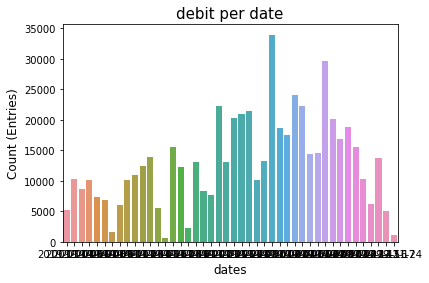

In [14]:
sns.countplot(df_merged['dateexpe'])
plt.title('debit per date', fontsize= 15)
plt.xlabel('dates', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)
plt.show()

c:\users\aymen\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


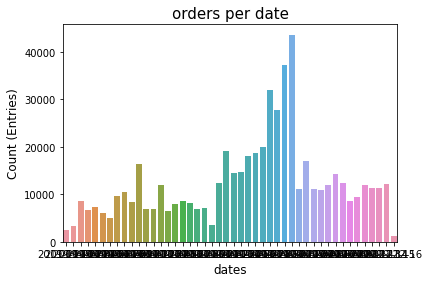

In [15]:
sns.countplot(df_merged['date_emission'])
plt.title('orders per date', fontsize= 15)
plt.xlabel('dates', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)
plt.show()

In [16]:
#removing features that we assume dont have a role in the prediction
df_merged_02 =df_merged_02.drop("datedecreationdecommande",axis=1)
df_merged_02 =df_merged_02.drop("time",axis=1)
df_merged_02 =df_merged_02.drop("date_emission",axis=1)
df_merged_02 =df_merged_02.drop("dateexpe",axis=1)
df_merged_02

,providerservice_id,debit_of_this_day,debit_of_yesterday,time_of_order_in_minutes,delay_in_days,orders_passed_yesterday
0,7,5232,157,840,2,2486
1,21,5232,157,509,2,2486
2,7,5232,157,964,2,2486
3,7,5232,157,1097,2,2486
4,7,5232,157,730,2,2486
...,...,...,...,...,...,...
570161,48,5080,13713,372,1,12196
570162,48,5080,13713,372,1,12196
570163,48,5080,13713,371,1,12196
570164,48,5080,13713,372,1,12196


c:\users\aymen\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


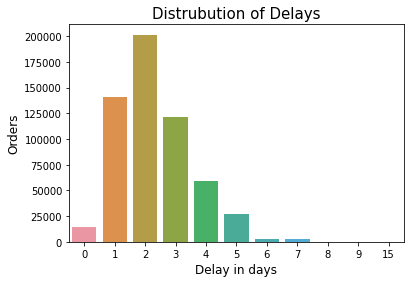

In [17]:
sns.countplot(df_merged_02['delay_in_days'])

plt.title('Distrubution of Delays', fontsize= 15)
plt.xlabel('Delay in days', fontsize=12)
plt.ylabel('Orders', fontsize=12)

plt.show()

c:\users\aymen\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Entries per service provider')

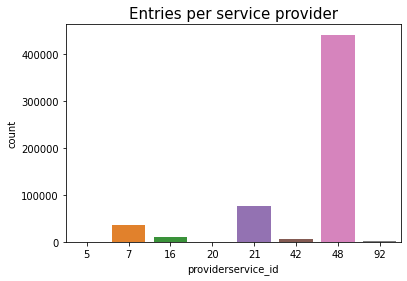

In [18]:
sns.countplot(df_merged_02['providerservice_id'])
plt.title('Entries per service provider', fontsize=15)

In [19]:
#we want to know the total number of orders received until today (for each day) (assuming we start with we had no queued orders before 01/11/2019)
df_buffer_04 = df_buffer_02
df_buffer_04["total_of_recieved_orders_up_to_yesterday"] = df_buffer_04['orders_passed_yesterday'].cumsum()
df_buffer_04

,orders_passed_yesterday,date_emission,total_of_recieved_orders_up_to_yesterday
1,2486,2019-11-02,2486
2,3401,2019-11-03,5887
3,8556,2019-11-04,14443
4,6622,2019-11-05,21065
5,7275,2019-11-06,28340
6,5970,2019-11-07,34310
7,5093,2019-11-08,39403
8,9738,2019-11-09,49141
9,10566,2019-11-10,59707
10,8416,2019-11-11,68123


In [20]:
#we want to know the total number of procecced orders before today (for each day)
df_buffer_05 = df_buffer_03
df_buffer_05["total_of_procecced_orders_up_to_yesterday"] = df_buffer_05['debit_of_yesterday'].cumsum()
df_buffer_05 = df_buffer_05.rename(columns = {'dateexpe':'date_emission'})
#we merged the two dataframes to extract a very important feature
df_buffer_05 = pd.merge(df_buffer_04, df_buffer_05)
df_buffer_05


,orders_passed_yesterday,date_emission,total_of_recieved_orders_up_to_yesterday,debit_of_yesterday,total_of_procecced_orders_up_to_yesterday
0,8556,2019-11-04,14443,157,157
1,6622,2019-11-05,21065,5232,5389
2,7275,2019-11-06,28340,10215,15604
3,5970,2019-11-07,34310,8638,24242
4,5093,2019-11-08,39403,10206,34448
5,9738,2019-11-09,49141,7262,41710
6,10566,2019-11-10,59707,6803,48513
7,8416,2019-11-11,68123,1533,50046
8,16387,2019-11-12,84510,6039,56085
9,6978,2019-11-13,91488,10049,66134


In [21]:
#we substract the procecced orders from the total orders to know the amount of build-up waiting orders
df_buffer_05["number_of_orders_waiting_to_be_procecced"]=df_buffer_05.total_of_recieved_orders_up_to_yesterday - df_buffer_05.total_of_procecced_orders_up_to_yesterday
df_buffer_05 = df_buffer_05.drop(["orders_passed_yesterday","date_emission","total_of_procecced_orders_up_to_yesterday","total_of_recieved_orders_up_to_yesterday"],axis=1)
df_buffer_05

,debit_of_yesterday,number_of_orders_waiting_to_be_procecced
0,157,14286
1,5232,15676
2,10215,12736
3,8638,10068
4,10206,4955
5,7262,7431
6,6803,11194
7,1533,18077
8,6039,28425
9,10049,25354


In [22]:
#we assemble the final dataframe to be used for the AI part
df_final = pd.merge(df_merged_02, df_buffer_05)
df_final.to_csv('df_final.csv')
df_final

,providerservice_id,debit_of_this_day,debit_of_yesterday,time_of_order_in_minutes,delay_in_days,orders_passed_yesterday,number_of_orders_waiting_to_be_procecced
0,7,5232,157,840,2,2486,14286
1,21,5232,157,509,2,2486,14286
2,7,5232,157,964,2,2486,14286
3,7,5232,157,1097,2,2486,14286
4,7,5232,157,730,2,2486,14286
...,...,...,...,...,...,...,...
565081,16,6140,10219,622,0,11325,11296
565082,16,6140,10219,644,0,11325,11296
565083,16,6140,10219,586,0,11325,11296
565084,20,6140,10219,648,0,11325,11296


In [23]:
#Importing additional deep learniong libs
#having more than 500k samples, we decided to go for deep learning as it hase the most potential with a large amounts of data
#Deep learning is also the fastest algo with such amount of data
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [47]:
#seperating labels from features
Y=df_final["delay_in_days"]
#this is a useless variable that will help us remove the last days for testing in the second approach
useless = df_final["delay_in_days"]
X=df_final.drop("delay_in_days",axis=1)
useless

0         2
1         2
2         2
3         2
4         2
         ..
565081    0
565082    0
565083    0
565084    0
565085    0
Name: delay_in_days, Length: 565086, dtype: int32

In [25]:
#first approach: 
#classic approach with random spliting of the dataset
#due to high amount of date a 5% split will be enough for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.05, shuffle=True)


In [26]:
#We chose to make a regression model and not a classification one
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               896       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 165,761
Trainable params: 165,761
Non-trainable params: 0
_________________________________________________________________


In [105]:
model = NN_model.fit(X_train, y_train, epochs=7, batch_size=32, validation_split = 0.2)

Epoch 1/7
13421/13421 [==============================] - 27s 2ms/step - loss: 0.2578 - mean_absolute_error: 0.2578 - val_loss: 0.2282 - val_mean_absolute_error: 0.2282 0s - loss: 0.2580 - mean_absolute_err
Epoch 2/7
13421/13421 [==============================] - 28s 2ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - val_loss: 0.2096 - val_mean_absolute_error: 0.2096
Epoch 3/7
13421/13421 [==============================] - 30s 2ms/step - loss: 0.2366 - mean_absolute_error: 0.2366 - val_loss: 0.2384 - val_mean_absolute_error: 0.2384
Epoch 4/7
13421/13421 [==============================] - 27s 2ms/step - loss: 0.2348 - mean_absolute_error: 0.2348 - val_loss: 0.1948 - val_mean_absolute_error: 0.1948
Epoch 5/7
13421/13421 [==============================] - 28s 2ms/step - loss: 0.2322 - mean_absolute_error: 0.2322 - val_loss: 0.2060 - val_mean_absolute_error: 0.2060
Epoch 6/7
13421/13421 [==============================] - 28s 2ms/step - loss: 0.1965 - mean_absolute_error: 0.1965 - val_l

In [106]:
#calculating evaluation accuracy with the predictiong being rounded to days
predictions = NN_model.predict(X_test)
predictions = predictions.round().astype(int)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))


0.8711024597416387


# def plot_graph(history,string):
    
    plt.plot(history.history[string],label='training '+string)
    plt.plot(history.history['val_'+string],label='validation '+string)
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.title(string+' vs epochs')
    plt.show()

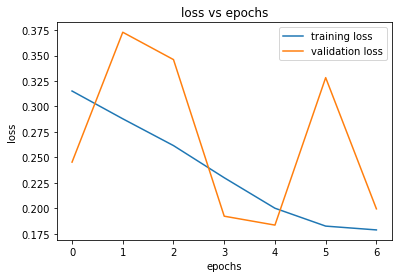

In [64]:
plot_graph(model,'loss')

In [48]:
#second approach:
#we take the last 8% days of the dataset wich represent days that are not present in the training dataset
#this evaluation method will test better the generalization capacities of the mdoel
#we shuflle the outcome
#and seperate labels from features
X_train_2, X_test_2, useless, useless_2 = train_test_split(df_final, useless, test_size=.08, shuffle=False)
X_train_2 = X_train_2.sample(frac = 1)
X_test_2 = X_test_2.sample(frac = 1)
Y_train_2 = X_train_2["delay_in_days"]
Y_test_2 = X_test_2["delay_in_days"]
X_train_2 = X_train_2.drop("delay_in_days",axis=1)
X_test_2 = X_test_2.drop("delay_in_days",axis=1)
X_test_2

,providerservice_id,debit_of_this_day,debit_of_yesterday,time_of_order_in_minutes,orders_passed_yesterday,number_of_orders_waiting_to_be_procecced
548368,16,13713,6140,946,12196,17352
547705,48,13713,6140,1194,11325,17352
563023,48,6140,10219,695,11423,11296
528140,48,15563,18897,1046,9340,14330
549687,21,10219,15563,837,11934,10190
...,...,...,...,...,...,...
563229,21,6140,10219,977,11423,11296
541534,16,13713,6140,1156,11325,17352
558110,48,10219,15563,1069,11934,10190
543178,48,13713,6140,669,11325,17352


In [49]:
#We chose to make a regression model and not a classification one
NN_model_2 = Sequential()

# The Input Layer :
NN_model_2.add(Dense(18, kernel_initializer='normal',input_dim = X_train_2.shape[1], activation='relu'))
NN_model_2.add(Dropout(0.07))
# The Hidden Layers :
NN_model_2.add(Dense(36, kernel_initializer='normal',activation='relu'))

NN_model_2.add(Dense(72, kernel_initializer='normal',activation='relu'))
NN_model_2.add(Dropout(0.07))
NN_model_2.add(Dense(6, kernel_initializer='normal',activation='relu'))


# The Output Layer :
NN_model_2.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model_2.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 18)                126       
_________________________________________________________________
dropout_2 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 36)                684       
_________________________________________________________________
dense_12 (Dense)             (None, 72)                2664      
_________________________________________________________________
dropout_3 (Dropout)          (None, 72)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 438       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [58]:
model_2 = NN_model_2.fit(X_train_2, Y_train_2, epochs=10, batch_size=32, validation_split = 0.2)

Epoch 1/10
12997/12997 [==============================] - 13s 973us/step - loss: 0.2525 - mean_absolute_error: 0.2525 - val_loss: 0.2994 - val_mean_absolute_error: 0.2994
Epoch 2/10
12997/12997 [==============================] - 11s 842us/step - loss: 0.2569 - mean_absolute_error: 0.2569 - val_loss: 0.3016 - val_mean_absolute_error: 0.3016
Epoch 3/10
12997/12997 [==============================] - 11s 852us/step - loss: 0.2564 - mean_absolute_error: 0.2564 - val_loss: 0.2938 - val_mean_absolute_error: 0.2938
Epoch 4/10
12997/12997 [==============================] - 12s 951us/step - loss: 0.2491 - mean_absolute_error: 0.2491 - val_loss: 0.4573 - val_mean_absolute_error: 0.4573
Epoch 5/10
12997/12997 [==============================] - 12s 950us/step - loss: 0.2527 - mean_absolute_error: 0.2527 - val_loss: 0.2741 - val_mean_absolute_error: 0.2741
Epoch 6/10
12997/12997 [==============================] - 14s 1ms/step - loss: 0.2547 - mean_absolute_error: 0.2547 - val_loss: 0.2609 - val_mean

In [59]:
predictions_2 = NN_model_2.predict(X_test_2)
predictions_2 = predictions_2.round().astype(int)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test_2, predictions_2))
#for x in range(100):
    #print(predictions_2[x])
print(predictions_2)
print(Y_test_2)

0.5345853518260446
[[1]
 [1]
 [1]
 ...
 [2]
 [1]
 [2]]
548368    0
547705    1
563023    1
528140    1
549687    1
         ..
563229    1
541534    1
558110    1
543178    1
552242    1
Name: delay_in_days, Length: 45207, dtype: int32


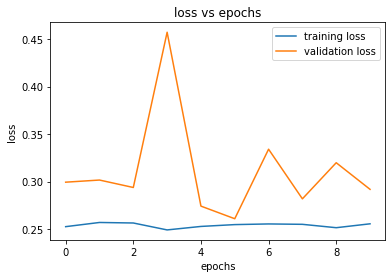

In [60]:
plot_graph(model_2,'loss')

In [ ]:
#The accuracy in this second approach is significanly lower than the first one.
#which indicates that our either our model have low generalization ability or that the dataframe and features that we composed aren’t so good
#we tried to investigate where this accuracy dropout came from with no success
#53% accuracy can either be good or bad depending on the error margin agreed upon with the client
#if and error margin of 1day is acceptable then the accuracy would skyrocket
#53% base accuracy however could be achieved without any AI of any sort and by just giving random lucky guesses.
#we also have noticed that the standard deviation of the accuracy score of the second approach is height (+-17%) meaning its highly volatile
#while it is not the case for the first approach (+-5%)
